In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv(r'D:\class\23rd march\lasso, ridge, elastic net\TASK-22_LASSO,RIDGE\car-mpg.csv')

In [3]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [4]:
data=data.drop(['car_name'],axis=1)
data['origin']=data['origin'].replace({1:'america',2:'europe',3:'asia'})
data=pd.get_dummies(data,columns=['origin'])
data=data.replace('?',np.nan)
data=data.apply(lambda x:x.fillna(x.median()),axis=0)

In [5]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0


In [7]:
X=data.drop(['mpg'],axis=1)
y=data[['mpg']]

In [8]:
X_s=preprocessing.scale(X)
X_s=pd.DataFrame(X_s,columns=X.columns)
y_s=preprocessing.scale(y)
y_s=pd.DataFrame(y_s,columns=y.columns)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X_s,y_s,test_size=0.30,random_state=1)
X_train.shape

(278, 10)

In [12]:
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)
for idx,col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name,regression_model.coef_[0][idx]))
intercept=regression_model.intercept_[0]
print('The intercept is {}'.format(intercept))
    
    

The coefficient for cyl is 0.3210223856916108
The coefficient for disp is 0.3248343091848391
The coefficient for hp is -0.2291695005943759
The coefficient for wt is -0.7112101905072294
The coefficient for acc is 0.014713682764191108
The coefficient for yr is 0.3755811949510748
The coefficient for car_type is 0.3814769484233101
The coefficient for origin_america is -0.07472247547584153
The coefficient for origin_asia is 0.04451525203567814
The coefficient for origin_europe is 0.0483485495394537
The intercept is 0.01928411610363976


In [13]:
ridge_model=Ridge(alpha=0.3)
ridge_model.fit(X_train,y_train)
print('Ridge model coef: {}'.format(ridge_model.coef_))

Ridge model coef: [[ 0.31649043  0.31320707 -0.22876025 -0.70109447  0.01295851  0.37447352
   0.37725608 -0.07423624  0.04441039  0.04784031]]


In [15]:
lasso_model=Lasso(alpha=0.1)
lasso_model.fit(X_train,y_train)
print('Lasso model coef: {}'.format(lasso_model.coef_))

Lasso model coef: [-0.         -0.         -0.01690287 -0.51890013  0.          0.28138241
  0.1278489  -0.01642647  0.          0.        ]


In [16]:
print(regression_model.score(X_train,y_train))
print(regression_model.score(X_test,y_test))
print(ridge_model.score(X_train,y_train))
print(ridge_model.score(X_test,y_test))
print(lasso_model.score(X_train,y_train))
print(lasso_model.score(X_test,y_test))

0.8343770256960538
0.8513421387780066
0.8343617931312616
0.8518882171608506
0.7938010766228453
0.8375229615977083


In [17]:
data_train_test=pd.concat([X_train,y_train],axis=1)
data_train_test.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe,mpg
350,-0.856321,-0.849116,-1.081977,-0.893172,-0.242570,1.351199,0.941412,0.773559,-0.497643,-0.461968,1.432898
59,-0.856321,-0.925936,-1.317736,-0.847061,2.879909,-1.085858,0.941412,-1.292726,-0.497643,2.164651,-0.065919
120,-0.856321,-0.695475,0.201600,-0.121101,-0.024722,-0.815074,0.941412,-1.292726,-0.497643,2.164651,-0.578335
12,1.498191,1.983643,1.197027,0.934732,-2.203196,-1.627426,-1.062235,0.773559,-0.497643,-0.461968,-1.090751
349,-0.856321,-0.983552,-0.951000,-1.165111,0.156817,1.351199,0.941412,-1.292726,2.009471,-0.461968,1.356035


In [18]:
import statsmodels.formula.api as smf
ols1=smf.ols(formula='mpg ~ cyl+disp+hp+wt+acc+yr+car_type+origin_america+origin_europe+origin_asia',data=data_train_test).fit()
ols1.params

Intercept         0.019284
cyl               0.321022
disp              0.324834
hp               -0.229170
wt               -0.711210
acc               0.014714
yr                0.375581
car_type          0.381477
origin_america   -0.074722
origin_europe     0.048349
origin_asia       0.044515
dtype: float64

In [19]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     150.0
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           3.12e-99
Time:                        11:43:14   Log-Likelihood:                -146.89
No. Observations:                 278   AIC:                             313.8
Df Residuals:                     268   BIC:                             350.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0193      0.025      0.

In [20]:
mse=np.mean((regression_model.predict(X_test)-y_test)**2)
import math
rmse=math.sqrt(mse)
print('Root Mean Squared Error:{}'.format(rmse))

Root Mean Squared Error:0.37766934254087847


C:\Users\MRUTYUNJAY\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:xlabel='acc', ylabel='mpg'>

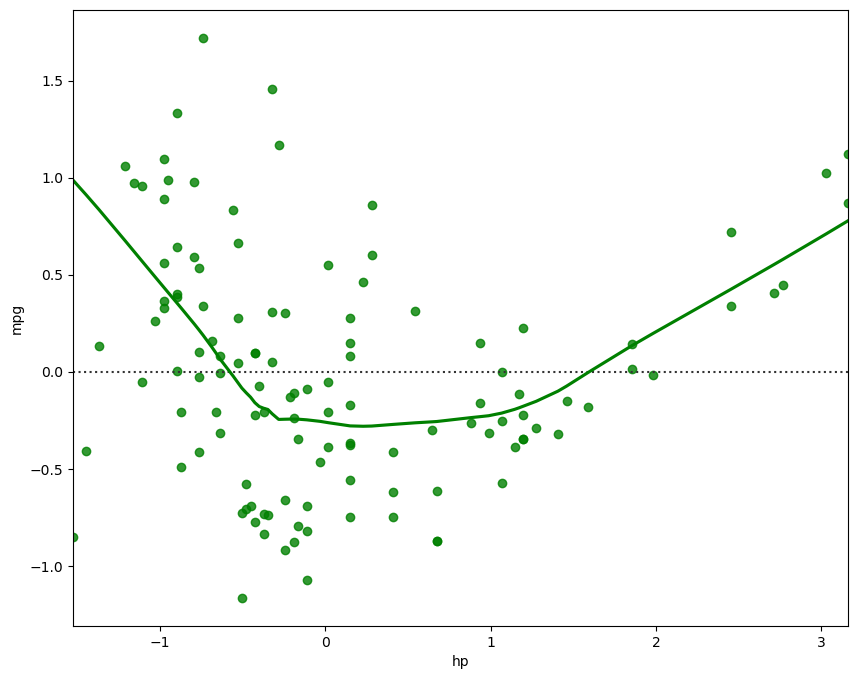

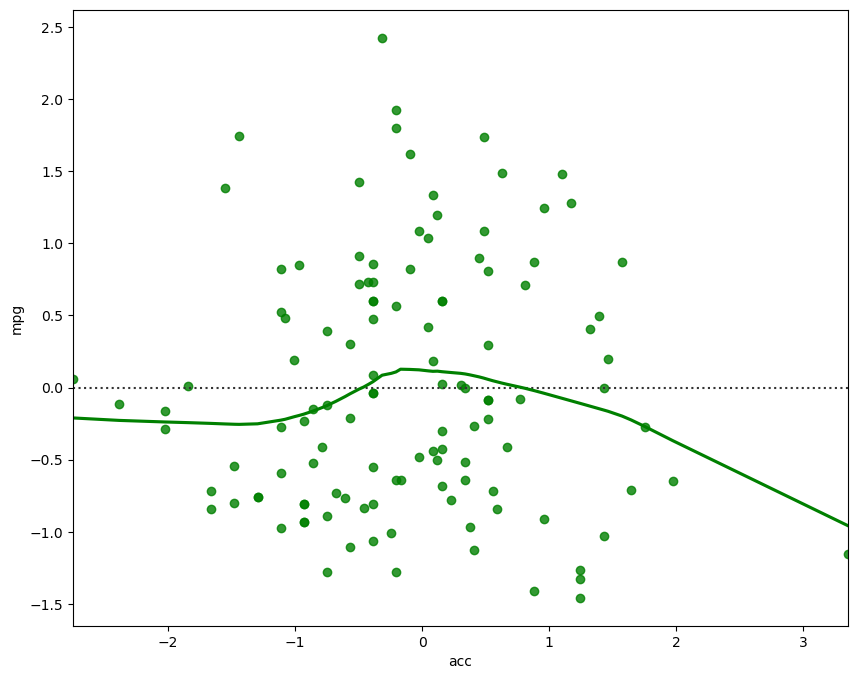

In [21]:
fig=plt.figure(figsize=(10,8))
sns.residplot(x=X_test['hp'],y=y_test['mpg'],color='green',lowess=True)
fig=plt.figure(figsize=(10,8))
sns.residplot(x=X_test['acc'],y=y_test['mpg'],color='green',lowess=True)

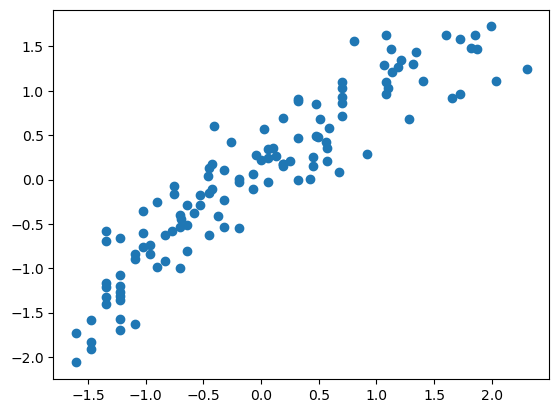

In [22]:
y_pred=regression_model.predict(X_test)
plt.scatter(y_test['mpg'],y_pred)